# Gözetimli Öğrenme Yöntemleri



## 1. Kütüphanelerin Çağrılması

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from scipy.stats import linregress
from sklearn.preprocessing import LabelEncoder 

## 2. Dosyayı Çağırma

In [12]:
veri=pd.read_csv('cars-2.csv')

[satir,sutun]=list(veri.shape)
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

# 3. Eksik Veri Analizi

In [ ]:
veri_2=veri.fillna(veri.mean())
veri_2.describe()

# 4. Aykırı Veri Analizi 

In [ ]:
q_low=veri_2["price"].quantile(0.05)
q_high=veri_2['price'].quantile(0.95)

veri_yeni=veri_2[(veri_2['price']>q_low)&(veri_2['price']<q_high)]
veri_yeni.count()

# 5. Verinin Kategorik Değerlerini Şifreleme 

In [14]:
le=LabelEncoder()
yeni_data=[]
for i in range(sutun):
    if veri_yeni.iloc[:,i].dtype==object or veri_yeni.iloc[:,i].dtype==bool:
        le_list=le.fit(veri_yeni.iloc[:,i].values)
        le_list=le.transform(veri_yeni.iloc[:,i].values)
    
    else:
        le_list=veri_yeni.iloc[:,i].values
    
    yeni_data.append(le_list)

yeni_data=pd.DataFrame(np.asarray(yeni_data).T,columns=veri.columns)
#yeni_data.describe()
yeni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          183 non-null    float64
 1   normalized-losses  183 non-null    float64
 2   make               183 non-null    float64
 3   fuel-type          183 non-null    float64
 4   aspiration         183 non-null    float64
 5   num-of-doors       183 non-null    float64
 6   body-style         183 non-null    float64
 7   drive-wheels       183 non-null    float64
 8   engine-location    183 non-null    float64
 9   wheel-base         183 non-null    float64
 10  length             183 non-null    float64
 11  width              183 non-null    float64
 12  height             183 non-null    float64
 13  curb-weight        183 non-null    float64
 14  engine-type        183 non-null    float64
 15  num-of-cylinders   183 non-null    float64
 16  engine-size        183 non

# 6. Verinin Bağımlı ve Bağımsız Değişkenlerinin Oluşturulması



In [15]:
bagimsiz=yeni_data.iloc[:,:-1]         
bagimli=yeni_data.iloc[:,-1]

# 7. Boyut Düşürme

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     29.48
Date:                Fri, 05 Aug 2022   Prob (F-statistic):           2.06e-46
Time:                        12:57:24   Log-Likelihood:                -1676.7
No. Observations:                 183   AIC:                             3403.
Df Residuals:                     158   BIC:                             3484.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -6.974e+04   1.73e+0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


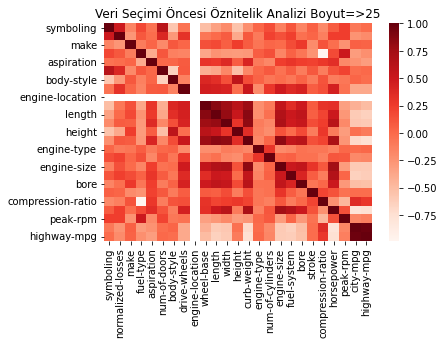

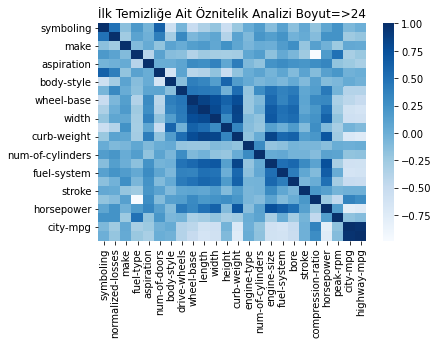

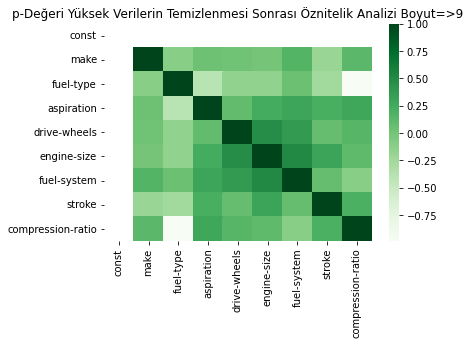

In [20]:
import statsmodels.api as sm

plt.figure('İlk Analiz')
plt.title('Veri Seçimi Öncesi Öznitelik Analizi Boyut=>{}'.format(bagimsiz.shape[1]))
sns.heatmap(bagimsiz.corr(),cmap=plt.cm.Reds)

#engine_drop değerini düşürme
yeni_bagimsiz=bagimsiz.drop(['engine-location'],axis=1)
yeni_bagimsiz.shape

plt.figure('İkinci Analiz')
plt.title('İlk Temizliğe Ait Öznitelik Analizi Boyut=>{}'.format(yeni_bagimsiz.shape[1]))
sns.heatmap(yeni_bagimsiz.corr(),cmap=plt.cm.Blues)

# p-Değeri Testiyle Öznitelik Seçimi
yeni_bagimsiz=sm.add_constant(yeni_bagimsiz)
ilk_model=sm.OLS(bagimli,yeni_bagimsiz)
analiz=ilk_model.fit()
print(analiz.summary())
oznitelik=dict(analiz.pvalues)
veri_sil=[]

for eleman in yeni_bagimsiz.columns:
  if oznitelik[eleman]>0.05:
    veri_sil.append(eleman)

#p-Değeri Yüksek Verileri Düşürme
yeni_bagimsiz=yeni_bagimsiz.drop(veri_sil,axis=1)

plt.figure('Üçüncü Analiz')
plt.title('p-Değeri Yüksek Verilerin Temizlenmesi Sonrası Öznitelik Analizi Boyut=>{}'.format(yeni_bagimsiz.shape[1]))
sns.heatmap(yeni_bagimsiz.corr(),cmap=plt.cm.Greens)

In [24]:
yeni_bagimsiz.drop(['const'],axis=1)

,make,fuel-type,aspiration,drive-wheels,engine-size,fuel-system,stroke,compression-ratio
0,0.0,1.0,0.0,2.0,130.0,5.0,2.68,9.0
1,0.0,1.0,0.0,2.0,130.0,5.0,2.68,9.0
2,0.0,1.0,0.0,2.0,152.0,5.0,3.47,9.0
3,1.0,1.0,0.0,1.0,109.0,5.0,3.40,10.0
4,1.0,1.0,0.0,0.0,136.0,5.0,3.40,8.0
...,...,...,...,...,...,...,...,...
178,21.0,1.0,0.0,2.0,141.0,5.0,3.15,9.5
179,21.0,1.0,1.0,2.0,141.0,5.0,3.15,8.7
180,21.0,1.0,0.0,2.0,173.0,5.0,2.87,8.8
181,21.0,0.0,1.0,2.0,145.0,3.0,3.40,23.0



 Optimal Temel Eksen Sayısı = 3 



,PCA-1,PCA-2,PCA-3
0,0.259690,1.947668,0.031599
1,0.259690,1.947668,0.031599
2,0.996992,1.961800,-0.025175
3,-0.443743,1.760507,0.293891
4,0.459708,1.820665,-0.257945
...,...,...,...
178,0.628554,-1.296787,-0.558681
179,0.628259,-1.279895,-0.743028
180,1.700488,-1.262907,-0.813265
181,0.767284,-1.575448,2.718608


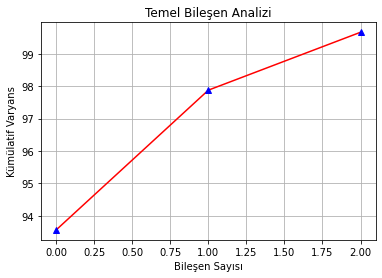

In [25]:
# Bağımsız Veriseti için PCA

pca_list=[]
for j in range(yeni_bagimsiz.shape[0]-1):
    pca=PCA(j+1,whiten=True)
    pca.fit(yeni_bagimsiz)
    x_pca=pca.transform(yeni_bagimsiz)
    pca_list.append(float("{:.2f}".format(100*sum(pca.explained_variance_ratio_))))

# Constructing PCA for the Dataset if Variance Ratio is Greater than or Equal to 0.98
    if sum(pca.explained_variance_ratio_)>0.99:
        gomulu_boyut=j+1
        print("\n Optimal Temel Eksen Sayısı = {} \n".format(gomulu_boyut))
        bagimsiz_pca=pca.transform(yeni_bagimsiz)
        break
        
plt.figure("Temel Bileşen Analizi")
plt.plot(pca_list,'-r')
plt.plot(pca_list,'^b')
plt.title("Temel Bileşen Analizi")
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Varyans")
plt.grid(True)

baslik=[]
for i in range(gomulu_boyut):
  baslik.append("PCA-{}".format(i+1))


bagimsiz_pca=pd.DataFrame(bagimsiz_pca,columns=baslik)
bagimsiz_pca

## 8. Tekil Analizler

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

sc=StandardScaler()
x_train,x_test,y_train,y_test=train_test_split(bagimsiz_pca,bagimli,test_size=0.2,shuffle=True)

x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# 9. Karar Ağacı Tahminleyicisi

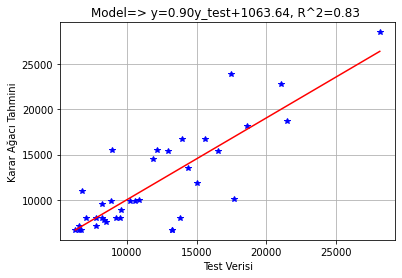

In [27]:
from sklearn.tree import DecisionTreeRegressor

ka_reg=DecisionTreeRegressor()
ka_reg.fit(x_train,y_train)
y_ka=ka_reg.predict(x_test)

slope,intercept,r_value,p_value,std_err=linregress(y_test,y_ka)
model=pd.DataFrame(np.column_stack((y_test,y_ka)),columns=['Test Verisi','Karar Ağacı'])
model=model.sort_values(by=['Test Verisi'])

plt.plot(model.iloc[:,0],model.iloc[:,1],'*b')
plt.plot(model.iloc[:,0],slope*model.iloc[:,0]+intercept,'-r')
plt.title("Model=> y={:.2f}y_test+{:.2f}, R^2={:.2f} ".format(slope,intercept,r_value))
plt.xlabel('Test Verisi')
plt.ylabel('Karar Ağacı Tahmini')
plt.grid(True)

# 10. Boostrap Aggregating Algoritmaları

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg=RandomForestRegressor()
rf_reg.fit(x_train,y_train)
y_rf=rf_reg.predict(x_test)

slope_2,intercept_2,r_value_2,p_value_2,std_err_2=linregress(y_test,y_rf)
model_2=pd.DataFrame(np.column_stack((y_test,y_rf)),columns=['Test Verisi','Rassal Orman'])
model_2=model.sort_values(by=['Test Verisi'])

plt.plot(model_2.iloc[:,0],model_2.iloc[:,1],'*b')
plt.plot(model_2.iloc[:,0],slope_2*model_2.iloc[:,0]+intercept_2,'-r')
plt.title("Model=> y={:.2f}y_test+{:.2f}, R^2={:.2f} ".format(slope_2,intercept_2,r_value_2))
plt.xlabel('Test Verisi')
plt.ylabel('Rassal Orman Tahmini')
plt.grid(True)

model_2

# 11. Boosting Algoritmaları
1. Adaboost Tahminleyicisi

,Test Verisi,Karar Ağacı
14,6295.000000,6738.333333
21,6529.000000,7143.500000
0,6575.000000,6738.333333
3,6692.000000,6738.333333
20,6785.000000,11048.000000
10,7053.000000,8013.000000
30,7775.000000,7995.000000
5,7775.000000,7126.000000
11,8195.000000,9586.666667
24,8238.000000,8058.000000


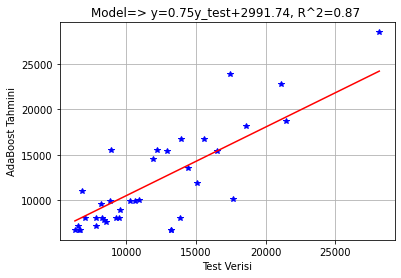

In [32]:
from sklearn.ensemble import AdaBoostRegressor

ab_reg=AdaBoostRegressor()
ab_reg.fit(x_train,y_train)
y_ab=ab_reg.predict(x_test)

slope_3,intercept_3,r_value_3,p_value_3,std_err_3=linregress(y_test,y_ab)
model_3=pd.DataFrame(np.column_stack((y_test,y_ab)),columns=['Test Verisi','AdaBoost'])
model_3=model.sort_values(by=['Test Verisi'])

plt.plot(model_3.iloc[:,0],model_3.iloc[:,1],'*b')
plt.plot(model_3.iloc[:,0],slope_3*model_3.iloc[:,0]+intercept_3,'-r')
plt.title("Model=> y={:.2f}y_test+{:.2f}, R^2={:.2f} ".format(slope_3,intercept_3,r_value_3))
plt.xlabel('Test Verisi')
plt.ylabel('AdaBoost Tahmini')
plt.grid(True)

model_3

2. Gradient Boost Tahmini

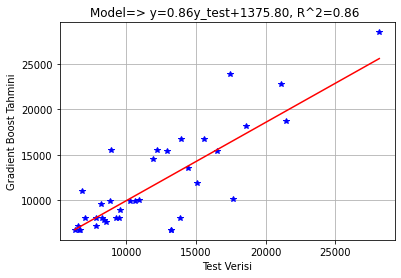

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg=GradientBoostingRegressor()
gb_reg.fit(x_train,y_train)
y_gb=gb_reg.predict(x_test)

slope_4,intercept_4,r_value_4,p_value_4,std_err_4=linregress(y_test,y_gb)
model_4=pd.DataFrame(np.column_stack((y_test,y_gb)),columns=['Test Verisi','Gradient Boost'])
model_4=model.sort_values(by=['Test Verisi'])

plt.plot(model_4.iloc[:,0],model_4.iloc[:,1],'*b')
plt.plot(model_4.iloc[:,0],slope_4*model_4.iloc[:,0]+intercept_4,'-r')
plt.title("Model=> y={:.2f}y_test+{:.2f}, R^2={:.2f} ".format(slope_4,intercept_4,r_value_4))
plt.xlabel('Test Verisi')
plt.ylabel('Gradient Boost Tahmini')
plt.grid(True)

3. XGBoost Tahmini

[14:00:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


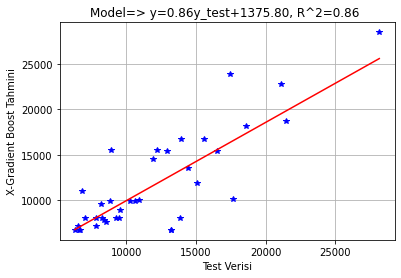

In [34]:
from xgboost import XGBRegressor

xg_reg=XGBRegressor()
xg_reg.fit(x_train,y_train)
y_xg=xg_reg.predict(x_test)

slope_5,intercept_5,r_value_5,p_value_5,std_err_5=linregress(y_test,y_gb)
model_5=pd.DataFrame(np.column_stack((y_test,y_xg)),columns=['Test Verisi','X-Gradient Boost'])
model_5=model.sort_values(by=['Test Verisi'])

plt.plot(model_5.iloc[:,0],model_5.iloc[:,1],'*b')
plt.plot(model_5.iloc[:,0],slope_5*model_5.iloc[:,0]+intercept_5,'-r')
plt.title("Model=> y={:.2f}y_test+{:.2f}, R^2={:.2f} ".format(slope_5,intercept_5,r_value_5))
plt.xlabel('Test Verisi')
plt.ylabel('X-Gradient Boost Tahmini')
plt.grid(True)

# 12. Yapay Sinir Ağları Modeli

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

function='relu'

ann_reg=Sequential()
ann_reg.add(Dense(units=2*x_train.shape[1],input_dim=x_train.shape[1],kernel_initializer = 'uniform',activation=function))
ann_reg.add(Dense(units=2*x_train.shape[1],input_dim=2*x_train.shape[1],kernel_initializer = 'uniform',activation=function))
ann_reg.add(Dense(units=x_train.shape[1],input_dim=2*x_train.shape[1],kernel_initializer = 'uniform',activation=function))
ann_reg.add(Dense(units=1,input_dim=x_train.shape[1],kernel_initializer = 'uniform',activation='relu'))
ann_reg.compile(optimizer='adam',loss='msle',metrics=['msle'])

ann_model=ann_reg.fit(x_train,y_train,batch_size=16,epochs=500)
y_ann=ann_reg.predict(x_test)
slope_6,intercept_6,r_value_6,p_value_6,std_err_6=linregress(y_test,y_ann.T)

model_6=pd.DataFrame(np.column_stack((y_test,y_ann)),columns=['Test Verisi','YSA'])
model_6=model.sort_values(by=['Test Verisi'])

# Derin Öğrenme Kayıp Fonksiyonu Oluşturma
mse=ann_model.history['msle']
epochs=list(range(1,len(mse)+1))

plt.figure('Derin Öğrenme Modeli İçin Logaritmik Hata (MSLE)')
plt.plot(epochs,mse,'-b')
plt.grid(True)
plt.title('Derin Öğrenme Modeli İçin Logaritmik Hata (MSLE)')
plt.xlabel('Bölümler')
plt.ylabel('MSLE (Birim Kare)')
plt.show()

# Model Grafiğini Oluşturma
plt.plot(model_6.iloc[:,0],model_6.iloc[:,1],'*b')
plt.plot(model_6.iloc[:,0],slope_6*model_6.iloc[:,0]+intercept_6,'-r')
plt.title("Model=> y={:.2f}y_test+{:.2f}, R^2={:.2f} ".format(slope_6,intercept_6,r_value_6))
plt.xlabel('Test Verisi')
plt.ylabel('YSA Tahmini')
plt.grid(True)
